## Well Log and Core Data Visualization 

Depth intervals of core in the  _CAPELLE-01_ well have been manually compiled in the _CAP-01_cores.csv_ file.

Petrophysical measurements taken on those cores are available at [NLOG data center](https://www.nlog.nl/datacenter/brh-overview), under tab _kernmetingen_. We have created _CAP-01_kernmetingen.cvs_ file.

In this notebook we will:
- Load and read LAS files using lasio 
- Load and read CSV files with pandas 
- Plot geophysical well logs using matplotlib 
- Plot petrophysical properties from cores with matplotlib 

In [1]:
import lasio , os  
import numpy as np    
import pandas as pd   

import matplotlib as mpl  
import matplotlib.pyplot as plt

%matplotlib inline    

In [2]:
# This function converts absent values to NaN
# E.g. null = -999.25 > Type <print(lasfile.well)> to find out this value
def valtonan(inp, val=-999.25):
    """Convert all 'val' to NaN's."""
    inp[inp==val] = np.nan
    return inp

#This function makes for cleaner axis plotting
def remove_last(ax, which='upper'):
    """Remove <which> from x-axis of <ax>.
    which: 'upper', 'lower', 'both'
    """
    nbins = len(ax.get_xticklabels())
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=nbins, prune=which))


In [3]:
# Read a single file 
lasfile = lasio.read(os.path.join("../data/raw/logs/2571_cap01_1985_comp.las"))

## Plotting Cored Depth Intervals

Loading the file _CAP-01_cores.csv_ with _pandas_ and inspecting its contents, we see that there are three cores only. These are indicated in column _Kernmetingen_ with a _YES_.

In [4]:
# Reading the .csv file containing depths and properties measured on cores 
cores = pd.read_csv('../data/raw/cores/CAP-01_cores.csv')

In [5]:
cores.head(10)

,Core,Top,Bottom,Length,Formations,Unnamed: 5,Top Formation,Bottom Formation,Kernmetingen,Operator,Year of core
0,CAP-01,3112.0,3125.0,13.0,Röt Randzandsteen Laagpakket,NaN,3081.0,3115.0,YES,NAM,1985.0
1,NaN,3154.0,3168.0,14.0,Onder-Röt Randkleisteen Laagpakket,NaN,3115.0,3140.0,YES,NaN,NaN
2,NaN,3205.0,3223.0,18.0,Solling Kleisteen Laagpakket,NaN,3140.0,3149.0,YES,NaN,NaN
3,NaN,NaN,NaN,NaN,Basale Solling Zandsteen Laagpakket,NaN,3149.0,3160.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Detfurth Kleisteen Laagpakket,NaN,3160.0,3168.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,Onder-Detfurth Zandsteen Laagpakket,NaN,3168.0,3176.0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,Boven-Volpriehausen Zandsteen Laagpakket,NaN,3176.0,3219.0,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,Onder-Volpriehausen Zandsteen Laagpakket,NaN,3219.0,3264.0,NaN,NaN,NaN


Columns two and three correspond with top and bottom depths of each interval. To plot them as a vertical line next to the well logs, we need to make an array as follows. These are the vertical lines (blue, red, green) in track 1.

In [6]:
# (x1, x2), (bottom, top), 'color'
c = [(0, 0), (cores['Bottom'][0], cores['Top'][0]), 'b',
     (0, 0), (cores['Bottom'][1], cores['Top'][1]), 'r', 
     (0, 0), (cores['Bottom'][2], cores['Top'][2]), 'g']

In [7]:
# Reading the .csv file containinig experimental petrophysical measurements 
km = pd.read_csv('../data/raw/cores/CAP-01_kernmetingen.csv')

In [8]:
# Depth interval where there are logs
core_int = km['deipte (m)']
core_int [(core_int >= km['deipte (m)'].min()) & (core_int <= km['deipte (m)'].max())]

0      3112.05
1      3112.05
2      3112.35
3      3112.35
4      3112.65
        ...   
152    3222.39
153    3222.69
154    3222.99
155    3223.29
156    3223.60
Name: deipte (m), Length: 157, dtype: float64

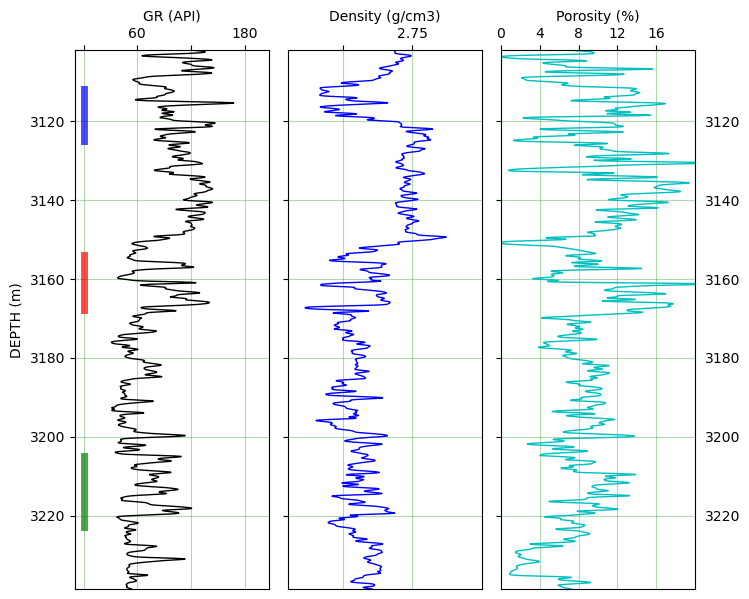

In [9]:
# Plotting core intervals along well logs

f3, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(8,7))
f3.subplots_adjust(wspace=0.1)
plt.gca().invert_yaxis()
plt.ylim(km['deipte (m)'].max()+15,km['deipte (m)'].min()-10)

# So that y-tick labels appear on left and right
plt.tick_params(labelright=True)

# Change tick-label globally
mpl.rcParams['xtick.labelsize'] = 6

# Track 1: GR
ax1.plot(*c, linewidth=5,alpha=0.7)
ax1.plot(lasfile['GR'], lasfile['DEPT'],'k', linewidth=1)
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top') 
ax1.set_xlabel('GR (API)')
ax1.set_ylabel('DEPTH (m)')
ax1.grid(True, c="g", alpha=0.3)

plt.setp(ax1.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax1)  # remove last value of x-ticks, see function defined in first cell

# Track 2: RHOB
ax2.plot(lasfile['RHOB'], lasfile['DEPT'], 'b', linewidth=1)
ax2.set_xlabel('Density (g/cm3)',va = 'top')
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
ax2.grid(True, c="g", alpha=0.3)
ax2.set_xlim(2.3, 3.0)
plt.setp(ax2.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax2)  

# Track 5: NPHI
ax3.plot(lasfile['NPHI']*100, lasfile['DEPT'], 'c', linewidth=1)
ax3.set_xlabel('Porosity (%)',va = 'top')
ax3.set_xlim(0,20)
ax3.xaxis.tick_top()
ax3.xaxis.set_label_position('top')
ax3.grid(True, c="g", alpha=0.3) 
remove_last(ax3)  

plt.show()


## Checking Measurements from Cores

The _CAP-01_kernmetingen.csv_ file contains the actual petrophysical measurements taken on those cores. This file contains the units as part of the key name, which would be removed during the data cleaning phase. However, in this notebook, we use the keys as they are.

In [10]:
# Reading the .csv file containinig experimental petrophysical measurements 
km = pd.read_csv('../data/raw/cores/CAP-01_kernmetingen.csv')

Using _.head()_ and _.tail()_ functions, we check the data to find invalid values, outliers, etc. For example, lines 1, 9 and 147 have a dash ('-') instead of null (or NaN), which must be corrected for plotting. 

In [11]:
km.head(10)

,nummer,deipte (m),Porositeit (%),hor. Perm (mD),Korreldichtheid (g/cm³)
0,K-0001,3112.05,13.2,10,2.65
1,K-0001C,3112.05,13.2,10,-
2,K-0002,3112.35,12.5,7.7,2.65
3,K-0002N,3112.35,12.6,10,2.65
4,K-0003,3112.65,14.0,29,2.65
5,K-0004,3112.96,12.7,11,2.66
6,K-0005,3113.24,13.4,20,2.65
7,K-0006,3113.63,8.4,11,2.72
8,K-0007,3114.05,12.2,89,2.65
9,K-0007C,3114.05,12.2,89,-


In [12]:
km.tail(10)

,nummer,deipte (m),Porositeit (%),hor. Perm (mD),Korreldichtheid (g/cm³)
147,K-0133C,3221.19,11.6,4.7,-
148,K-0134,3221.49,7.6,0.47,2.67
149,K-0135,3221.79,11.1,2.8,2.64
150,K-0136,3222.09,12.2,10,2.65
151,K-0136N,3222.09,12.2,12,2.65
152,K-0137,3222.39,12.1,6.8,2.65
153,K-0138,3222.69,10.3,2.3,2.65
154,K-0139,3222.99,7.8,1.3,2.68
155,K-0140,3223.29,13.0,8.6,2.66
156,K-0141,3223.60,11.7,4.8,2.66


Indeed, the presence of strings ('-') makes data appear as _object_, not as an array. For what one can not plot them. The two columns that contain numerical values are _diepte_ and _Porositeit_. 

In [13]:
#km.describe()

In [14]:
# Print how many and which properties 
# Note that the data type is Object, not array
km.columns

Index(['nummer', 'deipte (m)', 'Porositeit (%)', 'hor. Perm (mD)',
       'Korreldichtheid (g/cm³)'],
      dtype='object')

In [15]:
# Depth interval where there are logs
core_int = km['deipte (m)']
core_int [(core_int >= km['deipte (m)'].min()) & (core_int <= km['deipte (m)'].max())]

0      3112.05
1      3112.05
2      3112.35
3      3112.35
4      3112.65
        ...   
152    3222.39
153    3222.69
154    3222.99
155    3223.29
156    3223.60
Name: deipte (m), Length: 157, dtype: float64

In [16]:
km['Korreldichtheid (g/cm³)']

0      2.65
1         -
2      2.65
3      2.65
4      2.65
       ... 
152    2.65
153    2.65
154    2.68
155    2.66
156    2.66
Name: Korreldichtheid (g/cm³), Length: 157, dtype: object

### Converting Objects into Data Arrays  
The following code removes strings (object) and converts data into arrays (float).

In [17]:
# Converting '-' into Nan and removing outliers
km2= valtonan(km, val='-')
km2= valtonan(km, val='0.66')
den2=km2['Korreldichtheid (g/cm³)']
dd2 = np.array(den2.values, dtype=float)
np.nanmin(dd2), np.nanmax(dd2)

(2.64, 2.98)

In [18]:
por2=km2['Porositeit (%)']
p2 = np.array(por2.values, dtype=float)
np.nanmin(p2), np.nanmax(p2)

(0.7, 18.1)

In [19]:
perm2=km2['hor. Perm (mD)']
p3 = np.array(perm2.values, dtype=float)
np.nanmin(p3), np.nanmax(p3)

(0.01, 89.0)

## Plotting Petrophysical Measurements

Let's plot together the curves and measurements for both the density and porosity. Note that both sources of petrophysical information have a good correlation. 

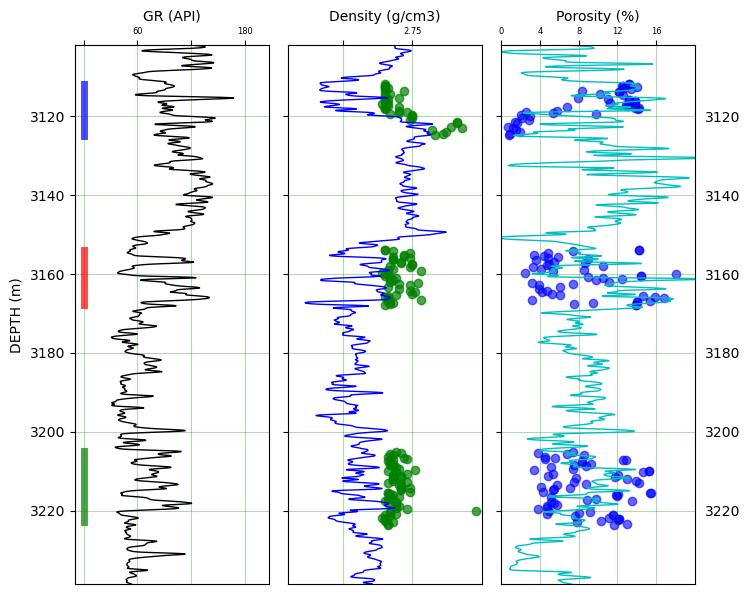

In [20]:

f3, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(8,7))
f3.subplots_adjust(wspace=0.1)
plt.gca().invert_yaxis()
plt.ylim(km['deipte (m)'].max()+15,km['deipte (m)'].min()-10)

# So that y-tick labels appear on left and right
plt.tick_params(labelright=True)

# Change tick-label globally
mpl.rcParams['xtick.labelsize'] = 6

# Track 1: GR
ax1.plot(*c, linewidth=5,alpha=0.7)
ax1.plot(lasfile['GR'], lasfile['DEPT'],'k', linewidth=1)
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top') 
ax1.set_xlabel('GR (API)')
ax1.set_ylabel('DEPTH (m)')
ax1.grid(True, c="g", alpha=0.3)

plt.setp(ax1.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax1)  # remove last value of x-ticks, see function defined in first cell

# Track 2: RHOB
ax2.plot(lasfile['RHOB'], lasfile['DEPT'], 'b', linewidth=1)
#ax2.scatter(km['Korreldichtheid (g/cm³)'],km['deipte (m)'],alpha=0.8,c='g')
ax2.scatter(dd2,km['deipte (m)'],alpha=0.7,c='g')
ax2.set_xlabel('Density (g/cm3)',va = 'top')
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
ax2.grid(True, c="g", alpha=0.3)
ax2.set_xlim(2.3, 3.0)
plt.setp(ax2.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax2)  

# Track 5: NPHI
ax3.plot(lasfile['NPHI']*100, lasfile['DEPT'], 'c', linewidth=1)
ax3.scatter(km['Porositeit (%)'],km['deipte (m)'],alpha=0.6,c='b')
ax3.set_xlabel('Porosity (%)',va = 'top')
ax3.set_xlim(0,20)
ax3.xaxis.tick_top()
ax3.xaxis.set_label_position('top')
ax3.grid(True, c="g", alpha=0.3) 
remove_last(ax3)  

plt.show()


Next, we will plot the petrophysical measurements alone to inspect their trends.